# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [213]:
# !pip install tensorflow

In [229]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

## Loading the dataset

In [230]:
df = pd.read_csv("/content/Churn.csv")

In [231]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

In [232]:
print(df.shape)
df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 10000 rows and 14 columns

In [233]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dropping Columns

In [234]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking for Missing Values

In [235]:
df.isna().any()
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [236]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

## Univariate Analysis

In [237]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### 1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?

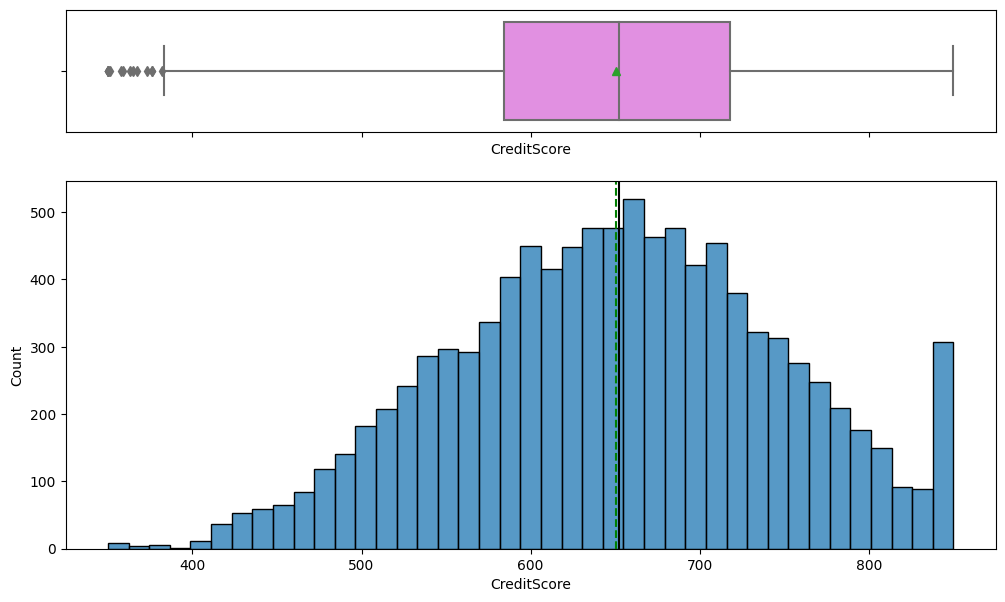

In [238]:
histogram_boxplot(df, "CreditScore")

The distribution is observed as right-skewed and there are a few noticeable outliers in "CreditScore".

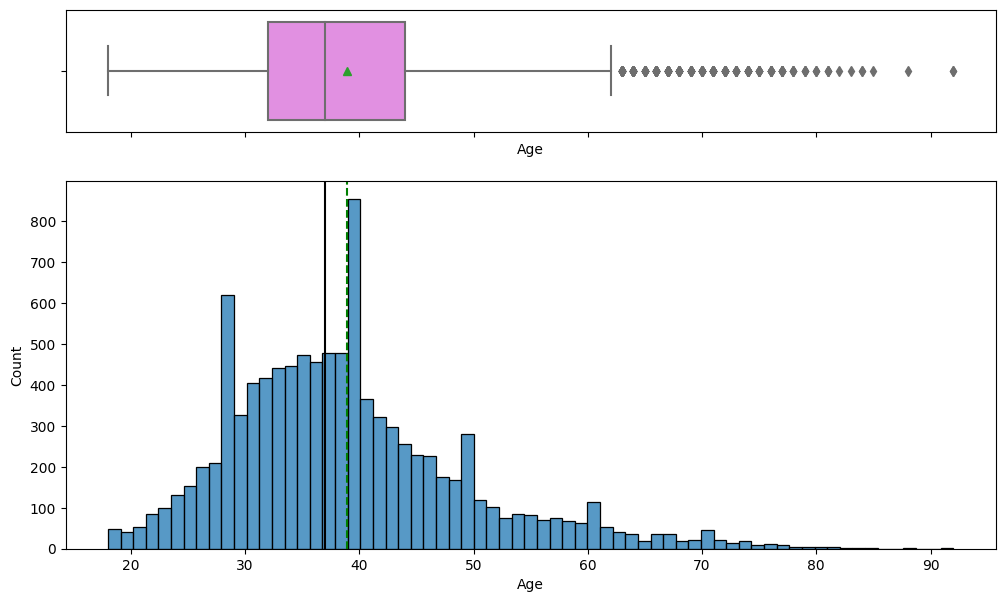

In [239]:
histogram_boxplot(df, "Age")

## Bivariate Analysis

### 2. How many active members are there with the bank?


In [151]:
active_members_count = df['IsActiveMember'].sum()
print(f'The number of active members: {active_members_count}')

The number of active members: 5151


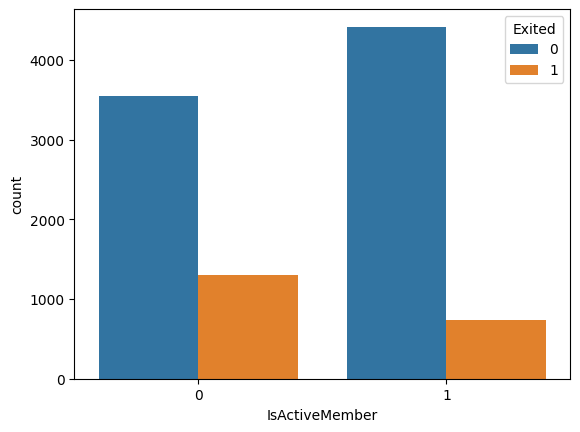

In [149]:
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
plt.show()

The Churning rate is high among the Non-Active Members

### 3. How are the different customer attributes correlated to each other?


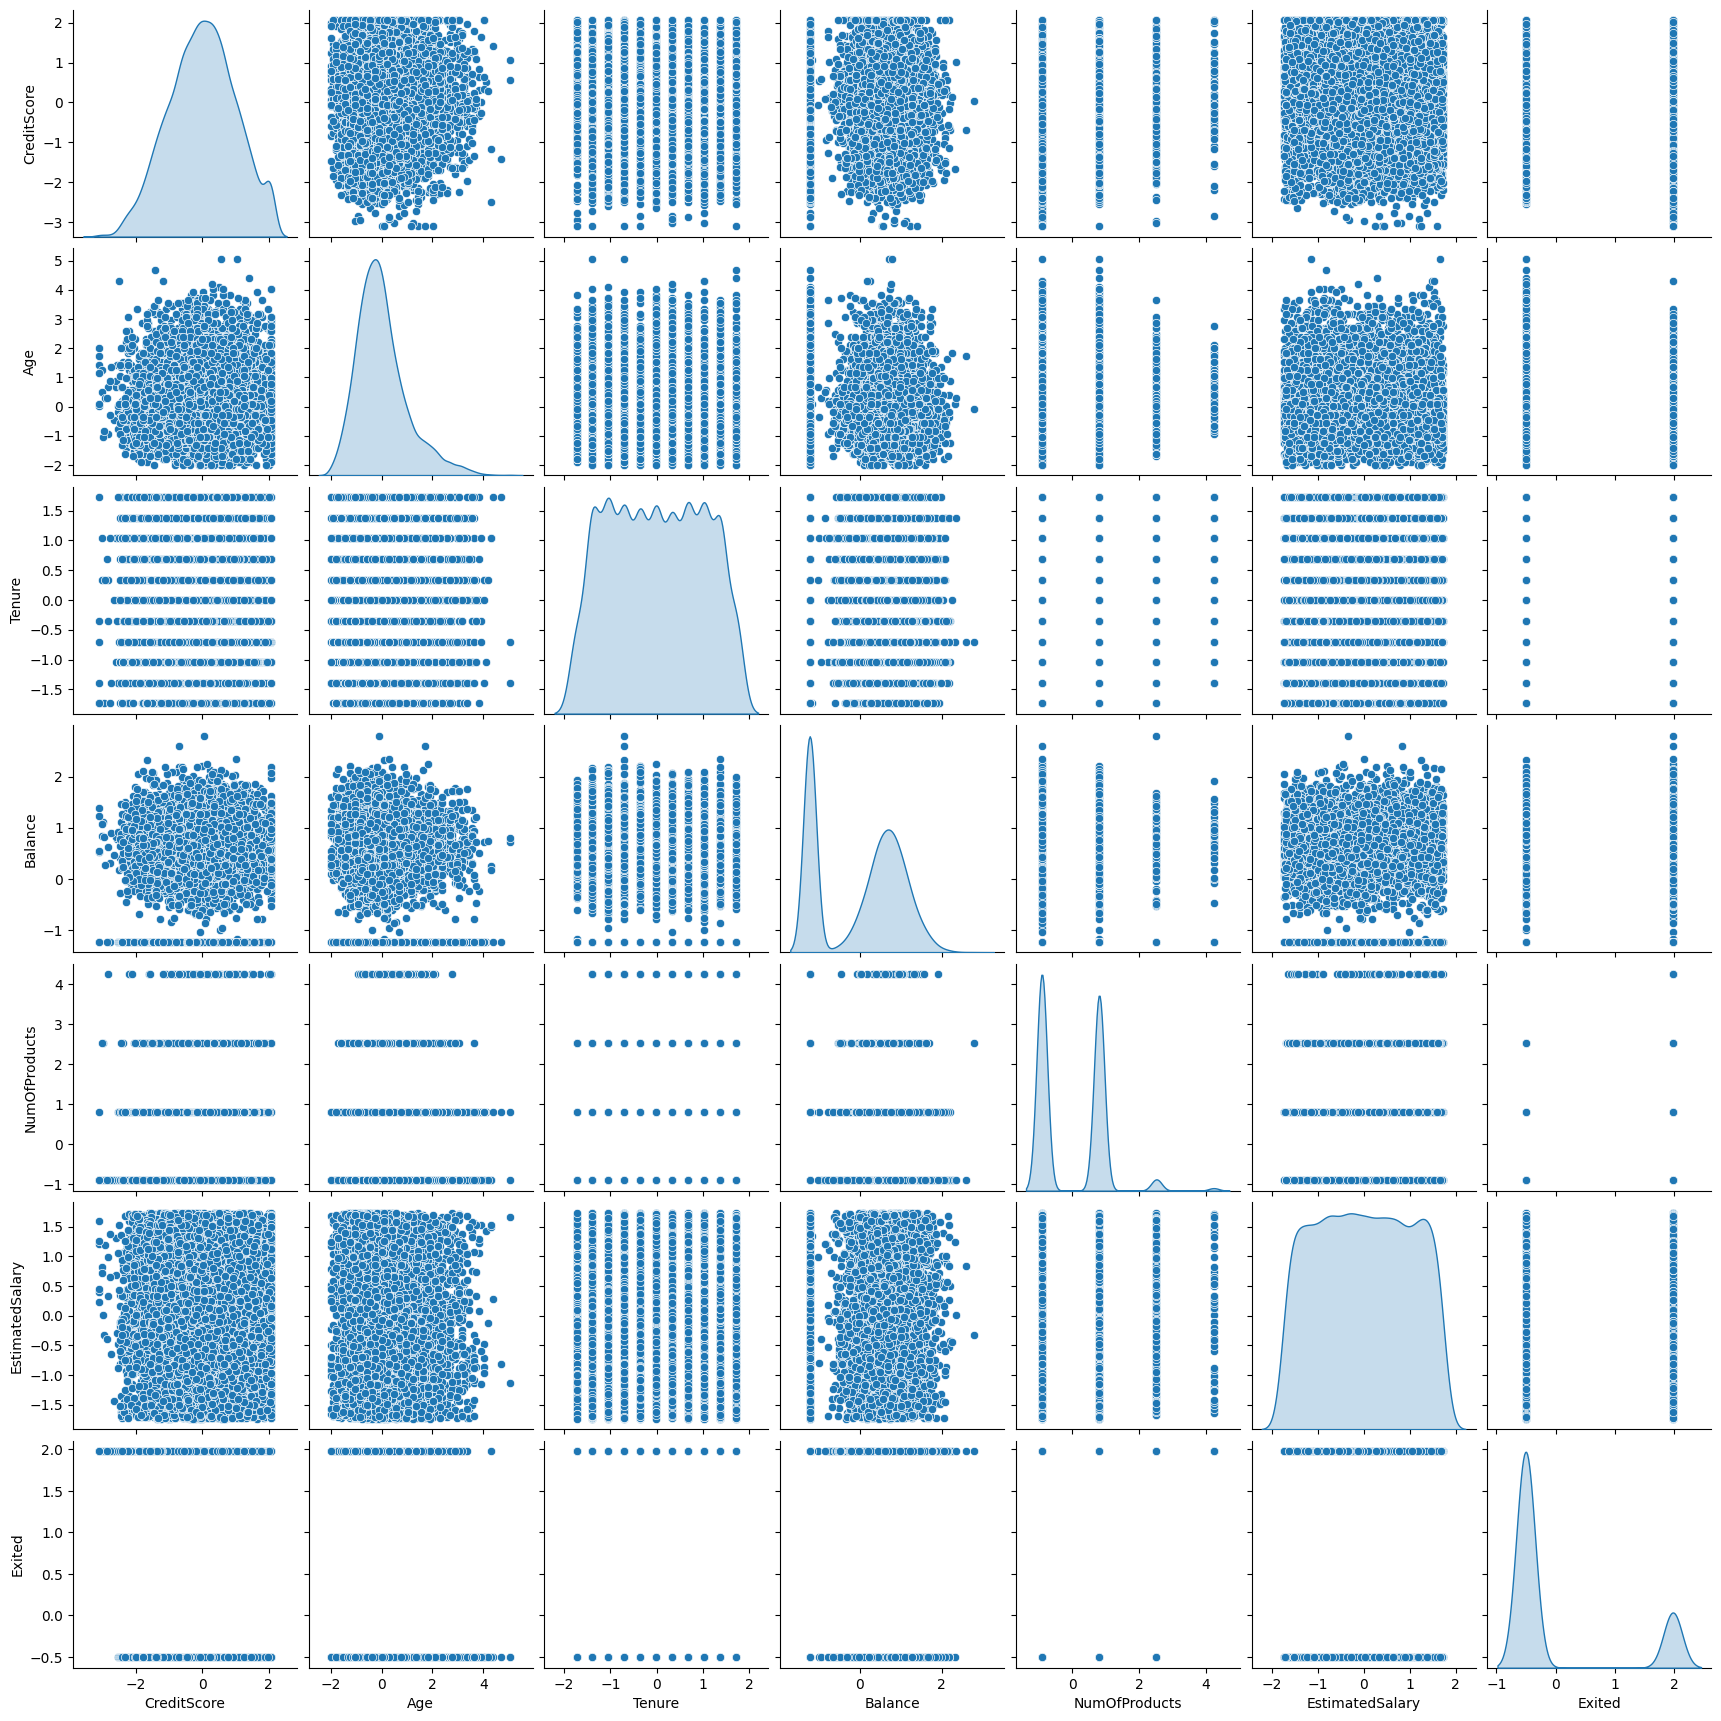

In [152]:
## Scale the data
scaler=StandardScaler()
## Extract only the Numerical Columns to perform Bivariate Analysis
subset=df.drop(['Geography','Gender','HasCrCard','IsActiveMember'],axis=1)
scaled=scaler.fit_transform(subset)
scaled_df=pd.DataFrame(scaled,columns=subset.columns)
sns.pairplot(scaled_df,diag_kind='kde')

<Axes: >

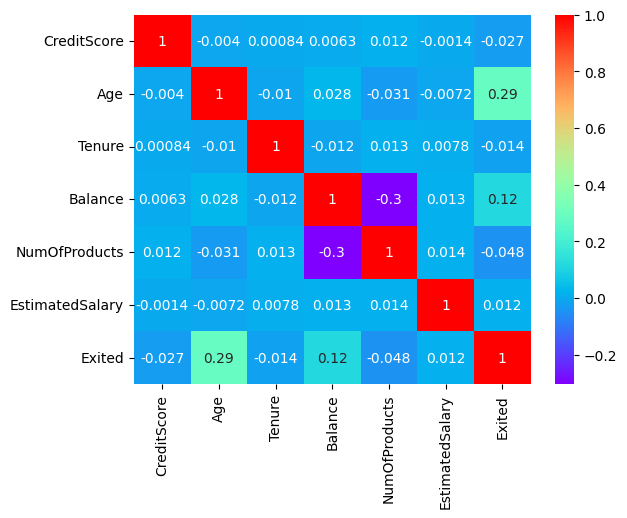

In [153]:
sns.heatmap(scaled_df.corr(),annot=True,cmap='rainbow')

It can be seen that there is no linear relationship between the variables



### 4.Who is churning more when compared to males and females?


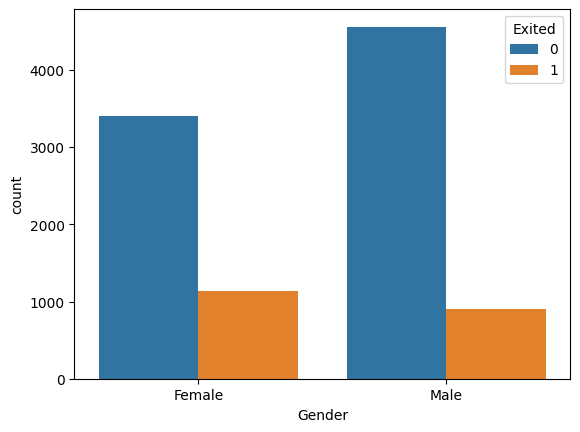

In [154]:
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()


It can be seen that Female customers are churning more when compared to the male customers

### 5. Customers from which geographical part are churning more?

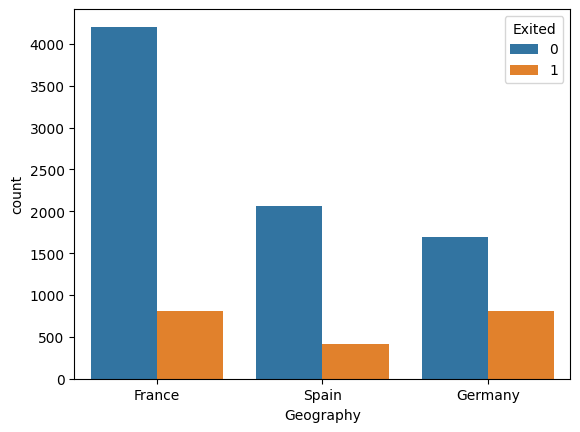

In [155]:
sns.countplot(x='Geography',data=df,hue='Exited')
plt.show()

Customers from Germany are churning more when compared to other locations

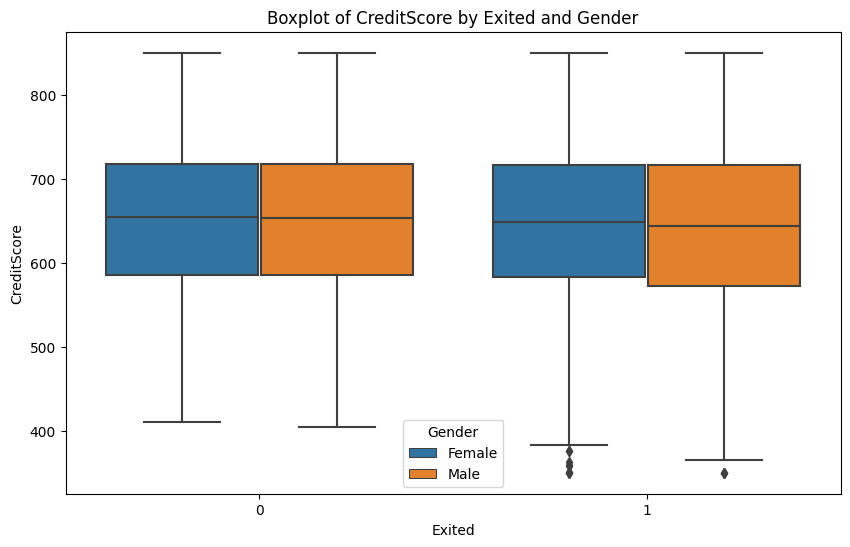

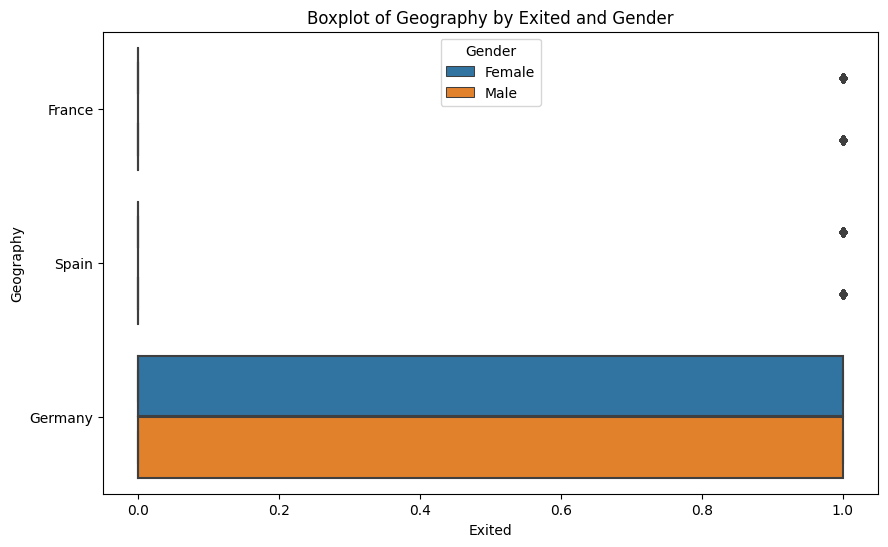

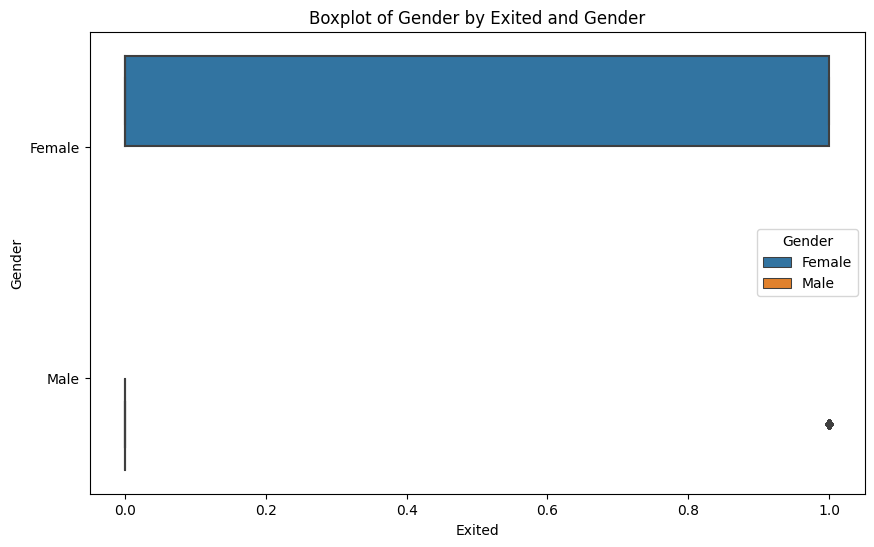

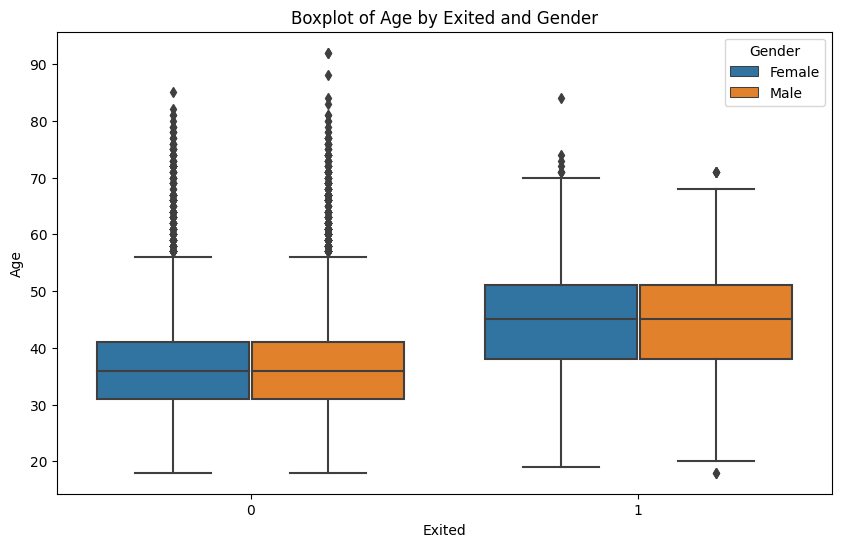

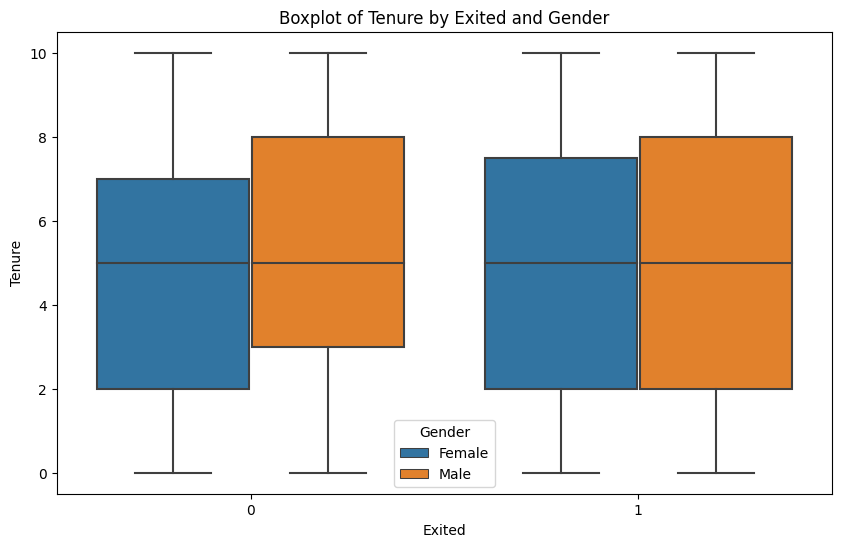

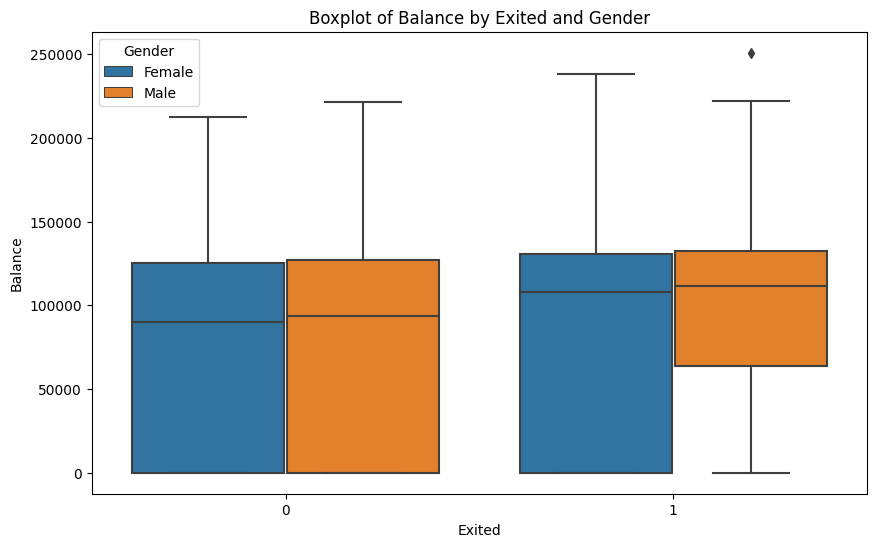

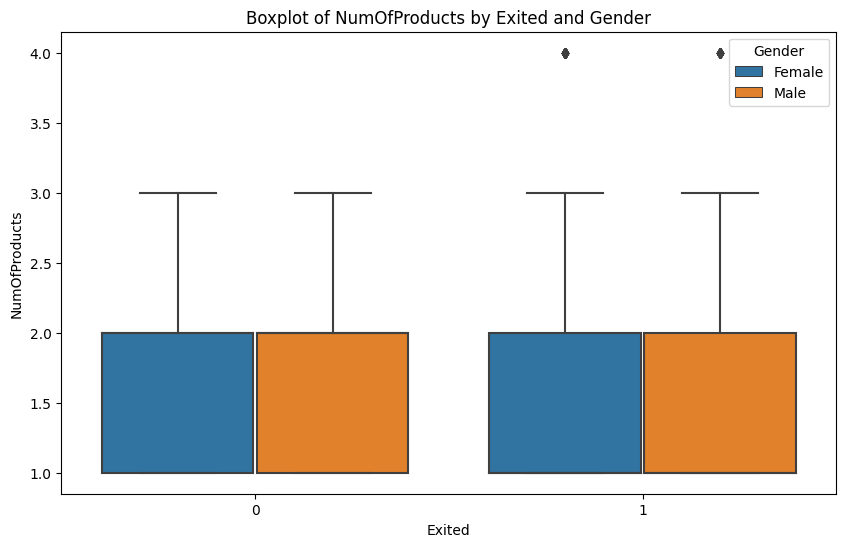

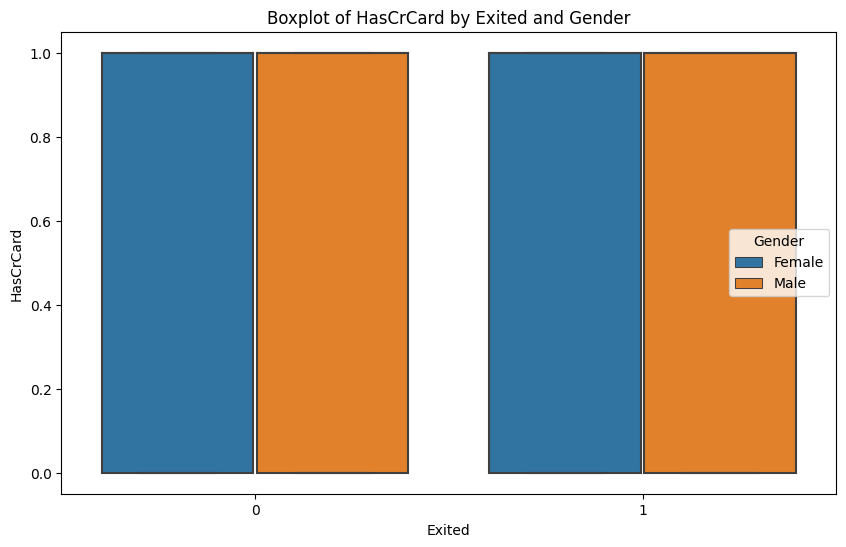

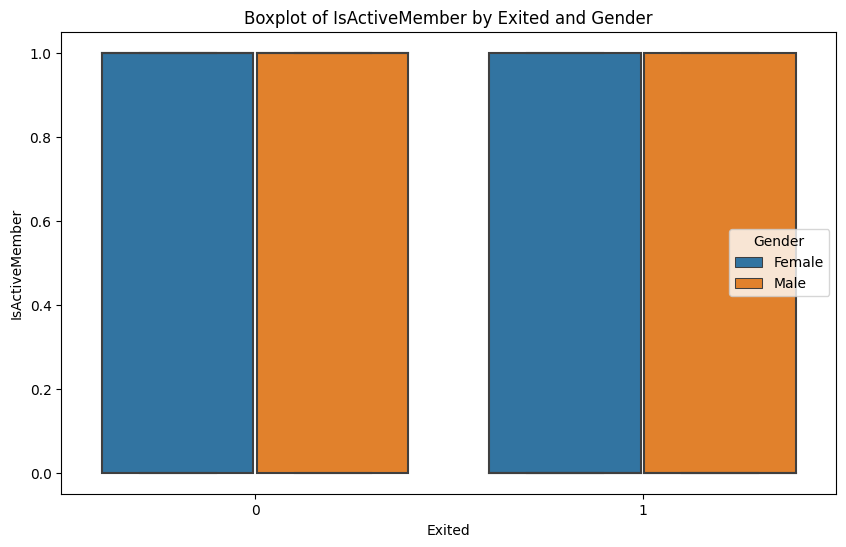

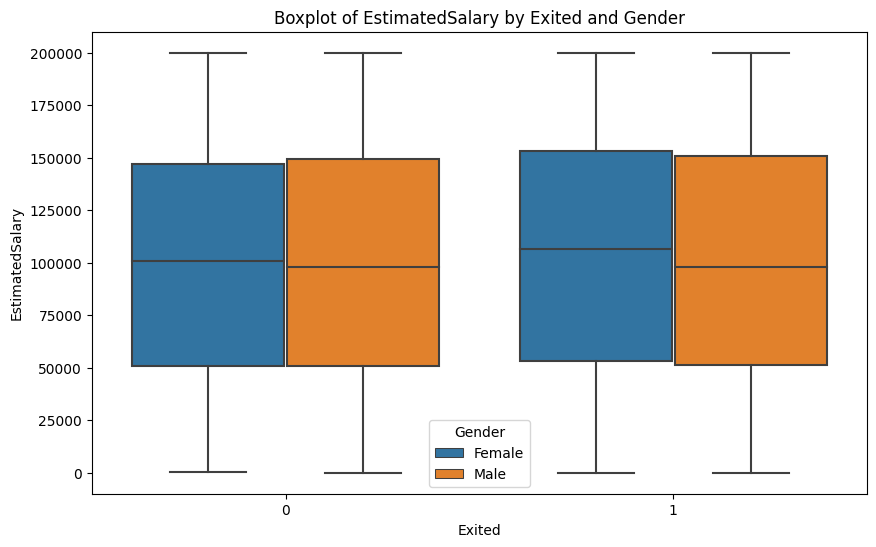

In [156]:
subset = df.drop('Exited', axis=1)

for i in subset.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Exited'], y=df[i], hue=df['Gender'])
    plt.title(f'Boxplot of {i} by Exited and Gender')
    plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [240]:
#All numerical columns for which we will check the outliers
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [241]:
# Visualize the distribution of numerical features to identify outliers
numerical_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']

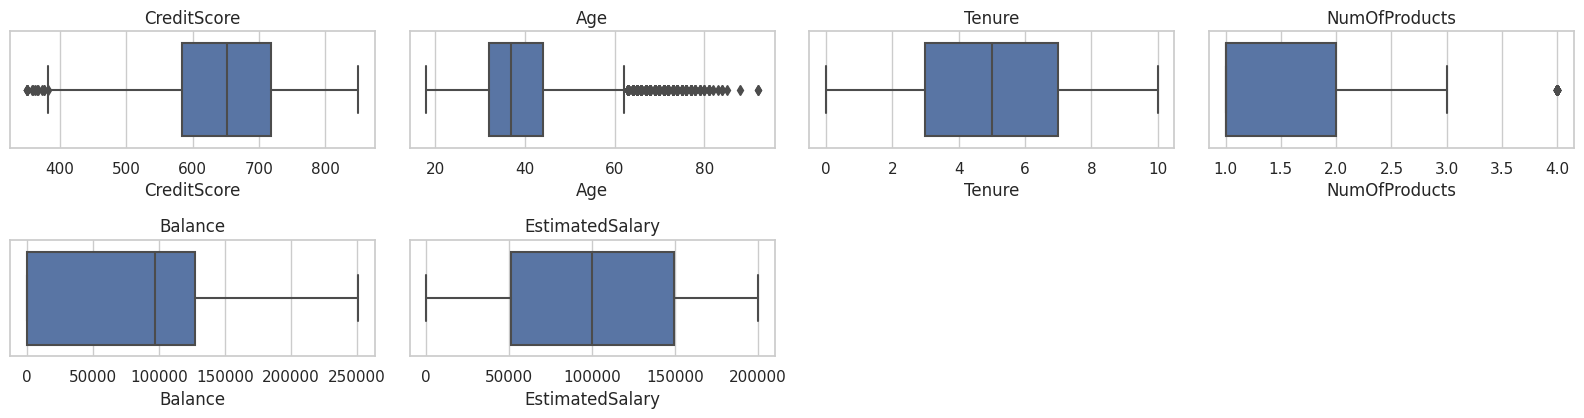

In [242]:
# Set the figure size and style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create subplots for box plots
for i, variable in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[variable], orient="v")
    plt.title(variable)

# Adjust layout
plt.tight_layout()

# Show the box plots
plt.show()

There are outliers in CreditScore, Age and NumOfProducts.

In [243]:
# List of columns to check for outliers
columns_to_check = ['CreditScore', 'Age', 'NumOfProducts']

# Define a threshold for identifying outliers (you can adjust this as needed)
threshold = 1.5

# Create a DataFrame to store the outliers
outliers = pd.DataFrame(columns=['Column', 'Outliers'])

# Iterate through the columns and count outliers using the IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = outliers.append({'Column': column, 'Outliers': len(column_outliers)}, ignore_index=True)

# Display the DataFrame with the number of outliers
print(outliers)

          Column Outliers
0    CreditScore       15
1            Age      359
2  NumOfProducts       60


Outlier Treatment

In [244]:
#Replace extreme values with less extreme values for retail_shop_num column(e.g., replace outliers with values at a 1st percentile).
from scipy.stats.mstats import winsorize
df['CreditScore'] = winsorize(df['CreditScore'], limits=[0.01, 0])

In [245]:
#Replace extreme values with less extreme value i.e 90th percentile
df['Age'] = winsorize(df['Age'], limits=[0, 0.1])

In [246]:
# List of columns to check for outliers
columns_to_check = ['CreditScore', 'Age', 'NumOfProducts']

# Define a threshold for identifying outliers (you can adjust this as needed)
threshold = 1.5

# Create a DataFrame to store the outliers
outliers = pd.DataFrame(columns=['Column', 'Outliers'])

# Iterate through the columns and count outliers using the IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = outliers.append({'Column': column, 'Outliers': len(column_outliers)}, ignore_index=True)

# Display the DataFrame with the number of outliers
print(outliers)

          Column Outliers
0    CreditScore        0
1            Age        0
2  NumOfProducts       60


Outliers in CreditScore ad Age columns has been removed, we will keep outliers of NumOfproducts as it is since the value is distributed in very small range.

### Feature Engineering

In [247]:
# Identify categorical columns that need one-hot encoding
categorical_columns = ['Geography', 'Gender']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the resulting dataset with one-hot encoding
print("Dataset after one-hot encoding:")
print(df.head())

Dataset after one-hot encoding:
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0 

### Splitting the dataset

In [248]:
#split dataset into dependent and independent variables
features = df.drop(['Exited'], axis=1)

target = df['Exited']

In [249]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

In [251]:
# Normalize the input features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

In [252]:
#Normalixe the test set
X_test_normalized = scaler.transform(X_test)

## Model Building

### Model Evaluation Criterion

Scenarios in which Model can make wrong predictions are as follows:

1. Model predicts that customer will not churn, but the customer attrites: Marketing team ignores such customers which ultimately leads to customer giving up the bank’s services — Type 2 error (False Negatives)

2. Model predicts that customer will attrite, but the customer does not attrite: Wastage of marketing resources on customers who will stay — Type 1 error (False Positives)

Error important to be minimized -

Type 2 errors or False Negatives need to be minimized as this will lead to loss of customers and costs incurred in providing the bank’s services. Maximizing the True Positives and minimizing the False Negatives will enable the bank to identify the customers who are most likely to attrite, and hence provide more effective services to retain customers and minimize attrition.

**Metric of Importance — Criteria for Model evaluation**

The bank wants to minimize Type 2 errors or False Negatives, and hence the model should maximize Recall

In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Define confusion matrix which will print values and percentage
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

SGD OPTIMIZER


In [254]:
#Build structure of simple neural network
model_1 = Sequential()
model_1.add(Dense(128, input_dim=X_train_normalized.shape[1], activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [255]:
#Compile model with sgd optimizer and binary_crossentropy as loss function
model_1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [256]:
#Train the model on train set
history_1=model_1.fit(X_train_normalized, y_train, epochs=20, verbose=True, validation_split=0.1)
print("Finished training the model")

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 0.5242 - accuracy: 0.7862 - val_loss: 0.4675 - val_accuracy: 0.8037
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.4816 - accuracy: 0.7935 - val_loss: 0.4524 - val_accuracy: 0.8037
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.4707 - accuracy: 0.7935 - val_loss: 0.4404 - val_accuracy: 0.8037
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4618 - accuracy: 0.7935 - val_loss: 0.4318 - val_accuracy: 0.8050
Epoch 5/20
225/225 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7968 - val_loss: 0.4237 - val_accuracy: 0.8125
Epoch 6/20
225/225 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8017 - val_loss: 0.4173 - val_accuracy: 0.8200
Epoch 7/20
225/225 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8062 - val_loss: 0.4122 - val_accuracy: 0.8263
Epoch 

In [257]:
# Evaluate the model on the test set
loss, accuracy = model_1.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8325
Test Loss: 0.4012
Test Accuracy: 0.8325


63/63 [==============================] - 0s 3ms/step


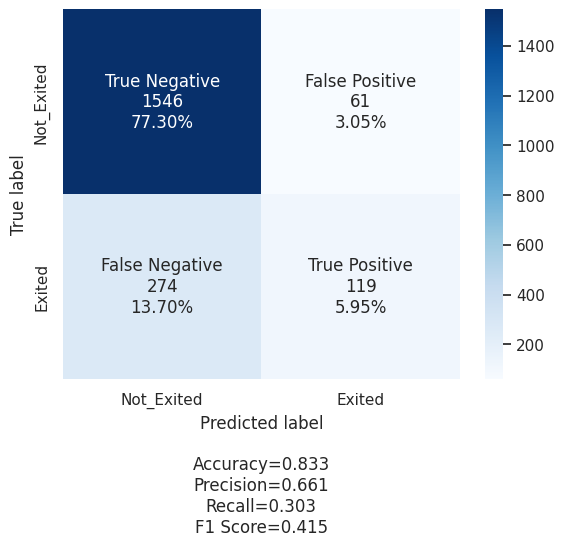

In [258]:
#Calculating the confusion matrix
y_pred1=model_1.predict(X_test_normalized)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm1=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

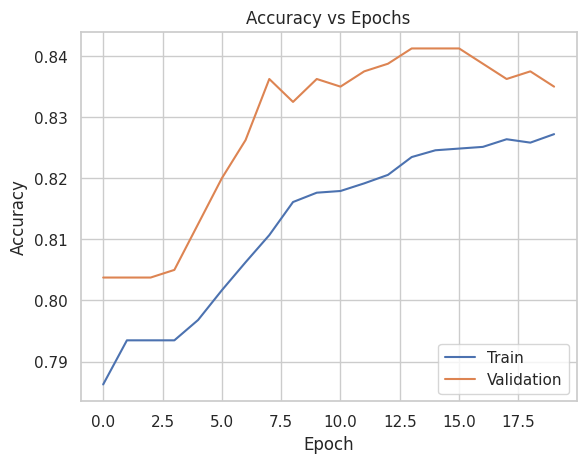

In [259]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.200990, G-Mean=0.709


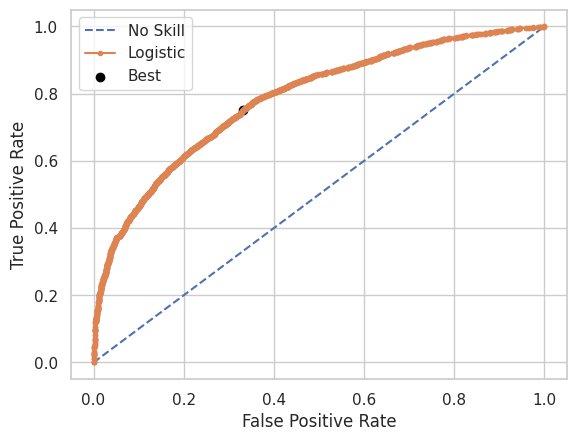

In [260]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_1.predict(X_train_normalized)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [261]:
#Append results into a dataframe for further use
result_df=pd.DataFrame()
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_1',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

In [262]:
result_df

,Model Name,Test Accuracy,Recall,Precision,F1 Score,G-mean
0,model_1,0.8325,0.302799,0.661111,0.415358,0.708893


### Insights
There seems to have a relatively high accuracy, but the other metrics (especially recall and F1 score) suggest that the model might not perform as well in identifying positive instances (churn cases).

### Model Building: Neural Network model with Adam Optimizer

In [263]:
# Build the neural network model
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train_normalized.shape[1], activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [264]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [265]:
# Train the model
history_2= model_2.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
225/225 - 2s - loss: 0.4664 - accuracy: 0.8028 - val_loss: 0.4009 - val_accuracy: 0.8388 - 2s/epoch - 8ms/step
Epoch 2/50
225/225 - 1s - loss: 0.4230 - accuracy: 0.8225 - val_loss: 0.3919 - val_accuracy: 0.8325 - 569ms/epoch - 3ms/step
Epoch 3/50
225/225 - 1s - loss: 0.4093 - accuracy: 0.8307 - val_loss: 0.3838 - val_accuracy: 0.8413 - 1s/epoch - 5ms/step
Epoch 4/50
225/225 - 2s - loss: 0.3908 - accuracy: 0.8394 - val_loss: 0.3712 - val_accuracy: 0.8413 - 2s/epoch - 7ms/step
Epoch 5/50
225/225 - 1s - loss: 0.3728 - accuracy: 0.8475 - val_loss: 0.3611 - val_accuracy: 0.8512 - 1s/epoch - 5ms/step
Epoch 6/50
225/225 - 1s - loss: 0.3607 - accuracy: 0.8514 - val_loss: 0.3582 - val_accuracy: 0.8487 - 1s/epoch - 6ms/step
Epoch 7/50
225/225 - 1s - loss: 0.3525 - accuracy: 0.8537 - val_loss: 0.3508 - val_accuracy: 0.8500 - 880ms/epoch - 4ms/step
Epoch 8/50
225/225 - 1s - loss: 0.3495 - accuracy: 0.8568 - val_loss: 0.3456 - val_accuracy: 0.8550 - 844ms/epoch - 4ms/step
Epoch 9/50
225/

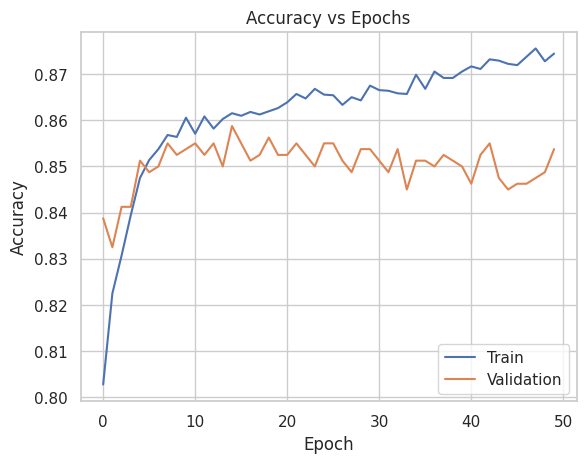

In [266]:
#Plot variation of train accuracy and validation accuracy with number of epochs
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

This is overfitting

In [267]:
# Evaluate the model on the test set
loss, accuracy = model_2.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8590
Test Loss: 0.3473
Test Accuracy: 0.8590


63/63 [==============================] - 0s 2ms/step


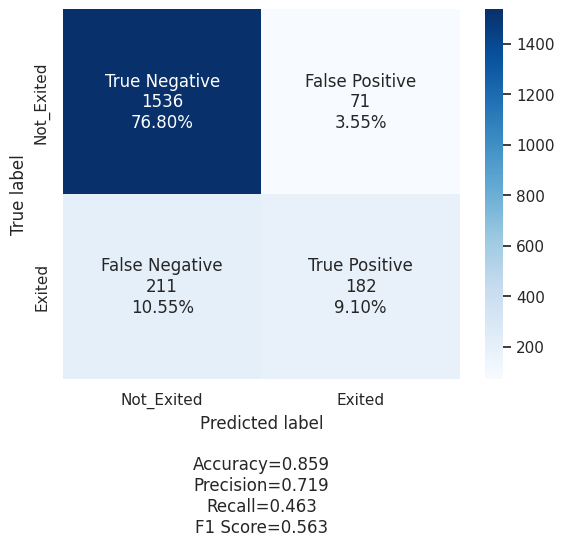

In [268]:
#Calculating the confusion matrix
y_pred2=model_2.predict(X_test_normalized)
y_pred2 = (y_pred2 > 0.5)
cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.160991, G-Mean=0.808


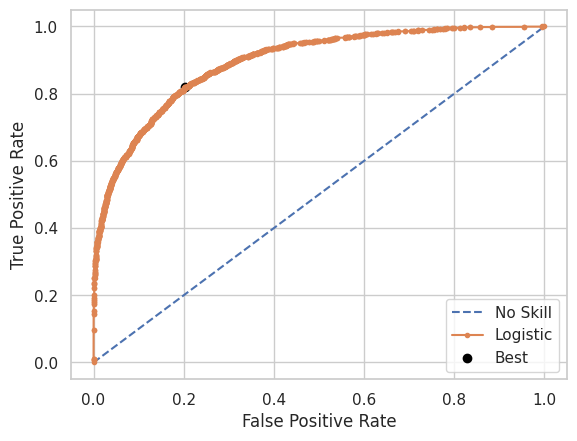

In [269]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_2.predict(X_train_normalized)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [270]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_2',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

### Model Improvement: Neural Network model with Dropout

In [271]:
# We will be adding the layers sequentially
model_3 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_3.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_3.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_3.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_3.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_3.add(Dense(1, activation='sigmoid'))

In [272]:
#compile the model
model_3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 128)               1536      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_217 (Dense)           (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_218 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [273]:
#train the model
history_3 = model_3.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
225/225 - 3s - loss: 0.4762 - accuracy: 0.8018 - val_loss: 0.4079 - val_accuracy: 0.8288 - 3s/epoch - 14ms/step
Epoch 2/50
225/225 - 0s - loss: 0.4330 - accuracy: 0.8197 - val_loss: 0.3975 - val_accuracy: 0.8350 - 428ms/epoch - 2ms/step
Epoch 3/50
225/225 - 0s - loss: 0.4201 - accuracy: 0.8258 - val_loss: 0.3863 - val_accuracy: 0.8475 - 418ms/epoch - 2ms/step
Epoch 4/50
225/225 - 0s - loss: 0.4039 - accuracy: 0.8324 - val_loss: 0.3649 - val_accuracy: 0.8438 - 452ms/epoch - 2ms/step
Epoch 5/50
225/225 - 0s - loss: 0.3835 - accuracy: 0.8417 - val_loss: 0.3493 - val_accuracy: 0.8500 - 433ms/epoch - 2ms/step
Epoch 6/50
225/225 - 0s - loss: 0.3712 - accuracy: 0.8483 - val_loss: 0.3446 - val_accuracy: 0.8612 - 478ms/epoch - 2ms/step
Epoch 7/50
225/225 - 0s - loss: 0.3648 - accuracy: 0.8512 - val_loss: 0.3480 - val_accuracy: 0.8487 - 435ms/epoch - 2ms/step
Epoch 8/50
225/225 - 0s - loss: 0.3533 - accuracy: 0.8549 - val_loss: 0.3395 - val_accuracy: 0.8550 - 449ms/epoch - 2ms/step
Ep

In [274]:
# Evaluate the model on the test set
loss, accuracy = model_3.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8590
Test Loss: 0.3433
Test Accuracy: 0.8590


63/63 [==============================] - 0s 1ms/step


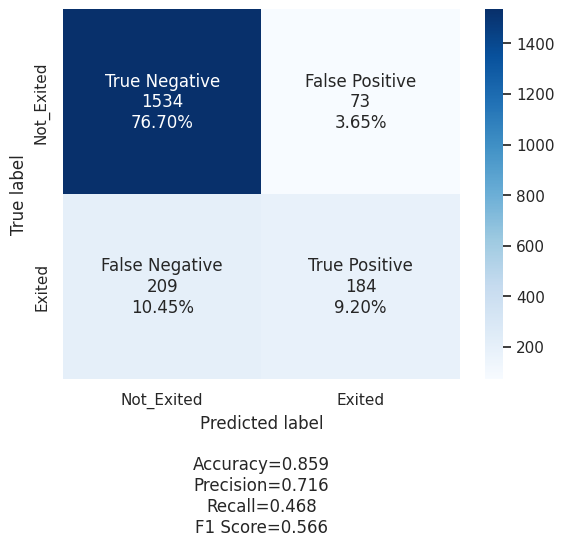

In [275]:
#Calculating the confusion matrix
y_pred3=model_3.predict(X_test_normalized)

#Let's predict using default threshold
y_pred3 = (y_pred3 > 0.5)
cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.241427, G-Mean=0.801


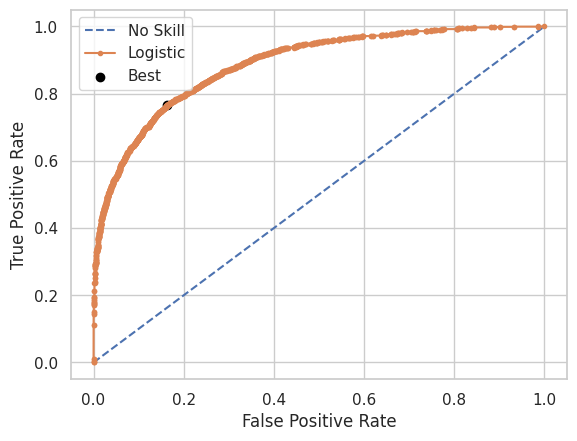

In [276]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_3.predict(X_train_normalized)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [277]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_3',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

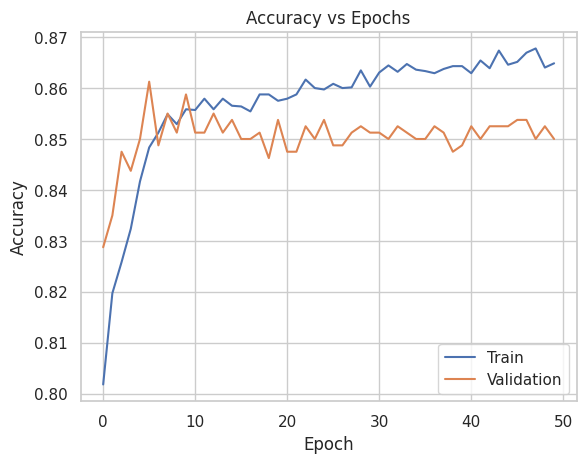

In [278]:
#Plot variation of train accuracy and validation accuracy with number of epochs
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Model Improvement: Neural Network model with Hyperparameter tuning

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [280]:
# pip install keras==2.12.0

In [281]:
## Hyperparameter tuning & Grid
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [283]:
#Create structure of a deep neural network with droupout,batch normalization
from tensorflow.keras.layers import BatchNormalization
model_4 = Sequential()
model_4.add(tf.keras.Input(shape=(11,)))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.10))
model_4.add(Dense(32, activation='relu'))
model_4.add(BatchNormalization(epsilon=0.001))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dense(1, activation='softmax'))

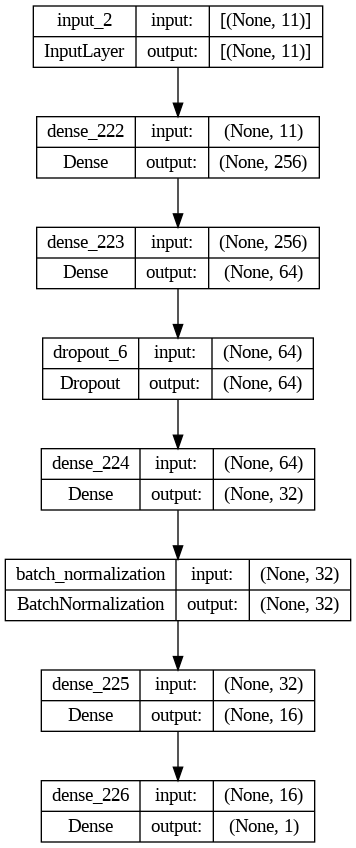

In [284]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True, show_layer_names=True)

In [286]:
#Compile model
from tensorflow.keras import optimizers

sgd = optimizers.Adam(lr=1e-3)
model_4.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [288]:
#Train model
history_4 = model_4.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
225/225 - 1s - loss: 0.3372 - accuracy: 0.2065 - val_loss: 0.3495 - val_accuracy: 0.1963 - 797ms/epoch - 4ms/step
Epoch 2/50
225/225 - 1s - loss: 0.3341 - accuracy: 0.2065 - val_loss: 0.3404 - val_accuracy: 0.1963 - 712ms/epoch - 3ms/step
Epoch 3/50
225/225 - 1s - loss: 0.3353 - accuracy: 0.2065 - val_loss: 0.3440 - val_accuracy: 0.1963 - 785ms/epoch - 3ms/step
Epoch 4/50
225/225 - 1s - loss: 0.3348 - accuracy: 0.2065 - val_loss: 0.3486 - val_accuracy: 0.1963 - 823ms/epoch - 4ms/step
Epoch 5/50
225/225 - 1s - loss: 0.3328 - accuracy: 0.2065 - val_loss: 0.3425 - val_accuracy: 0.1963 - 600ms/epoch - 3ms/step
Epoch 6/50
225/225 - 1s - loss: 0.3345 - accuracy: 0.2065 - val_loss: 0.3515 - val_accuracy: 0.1963 - 503ms/epoch - 2ms/step
Epoch 7/50
225/225 - 1s - loss: 0.3290 - accuracy: 0.2065 - val_loss: 0.3446 - val_accuracy: 0.1963 - 511ms/epoch - 2ms/step
Epoch 8/50
225/225 - 1s - loss: 0.3312 - accuracy: 0.2065 - val_loss: 0.3507 - val_accuracy: 0.1963 - 522ms/epoch - 2ms/step


63/63 [==============================] - 0s 2ms/step


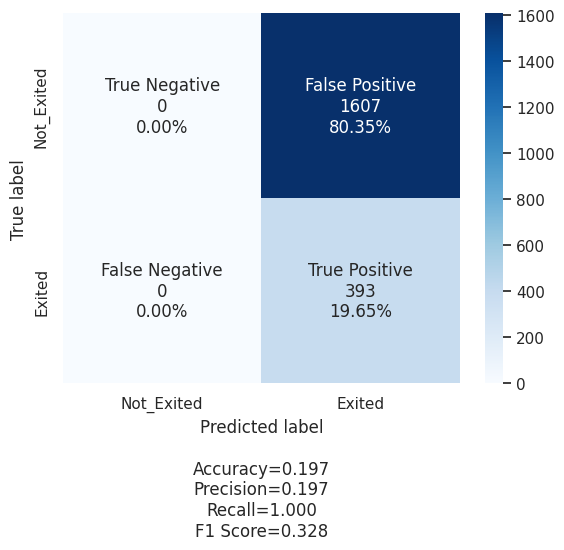

In [289]:
#Calculating the confusion matrix
y_pred4=model_4.predict(X_test_normalized)
y_pred4 = (y_pred4 > 0.5)
cm4=confusion_matrix(y_test, y_pred4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

The predicted values arof exited,i.e., error in learning.

250/250 [==============================] - 0s 2ms/step
Best Threshold=2.000000, G-Mean=0.000


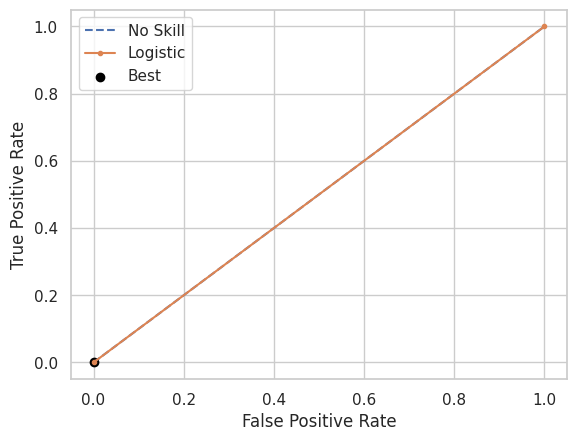

In [290]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_4.predict(X_train_normalized)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [291]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_4',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

In [292]:
result_df

,Model Name,Test Accuracy,Recall,Precision,F1 Score,G-mean
0,model_1,0.8325,0.302799,0.661111,0.415358,0.708893
1,model_2,0.8590,0.463104,0.719368,0.563467,0.808135
2,model_3,0.8590,0.468193,0.715953,0.566154,0.801104
3,model_4,0.1965,1.000000,0.196500,0.328458,0.000000


### GridSearchCV

In [293]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV

In [294]:
# Define a function to create the neural network model
def create_model():
    # Create a sequential model
    model = Sequential()
    # Add an input layer with 11 input features
    model.add(Dense(11, input_dim=11, activation='relu'))
    # Add a hidden layer with 10 units
    model.add(Dense(10, activation='relu'))
    # Add an output layer with 1 unit and sigmoid activation
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model with binary crossentropy loss and adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Return the model
    return model

In [295]:
# Create a KerasClassifier object with the create_model function
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to tune
params = {
    'epochs': [10,20,50], # Number of epochs to train the model
    'batch_size': [32, 64, 128], # Number of samples per gradient update
}

# Create a GridSearchCV object with the model and the params
gs = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1)


# Fit the GridSearchCV object to the data
gs.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7945
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.7956
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7993
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8125
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8200
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8226
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8259
Epoch 10/50
250/250 [===================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x79519f417010>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128], 'epochs': [10, 20, 50]},
             verbose=1)

In [296]:
# Print the best score and the best parameters
print('Best score:', gs.best_score_)
print('Best parameters:', gs.best_params_)


Best score: 0.8544999957084656
Best parameters: {'batch_size': 32, 'epochs': 50}


In [297]:
# Access the best parameters and best estimator from GridSearchCV
best_params = gs.best_params_
best_model = gs.best_estimator_

# Create the final model using the best parameters
final_model_gs = Sequential()
final_model_gs.add(Dense(11, input_dim=11, activation='relu'))
final_model_gs.add(Dense(10, activation='relu'))
final_model_gs.add(Dense(1, activation='sigmoid'))
final_model_gs.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set the best parameters obtained from GridSearchCv
# Fit the final model to the data
final_model_gs.fit(X_train_normalized, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.2, verbose=1)

# Evaluate the final model on the test set
accuracy = final_model_gs.evaluate(X_test_normalized, y_test)[1]
print("Accuracy on test set:", accuracy)


Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7853 - val_loss: 0.4573 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7984 - val_loss: 0.4376 - val_accuracy: 0.8200
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.8052 - val_loss: 0.4255 - val_accuracy: 0.8288
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8144 - val_loss: 0.4188 - val_accuracy: 0.8281
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8183 - val_loss: 0.4143 - val_accuracy: 0.8306
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8214 - val_loss: 0.4118 - val_accuracy: 0.8319
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8264 - val_loss: 0.4091 - val_accuracy: 0.8325
Epoch 

63/63 [==============================] - 0s 1ms/step


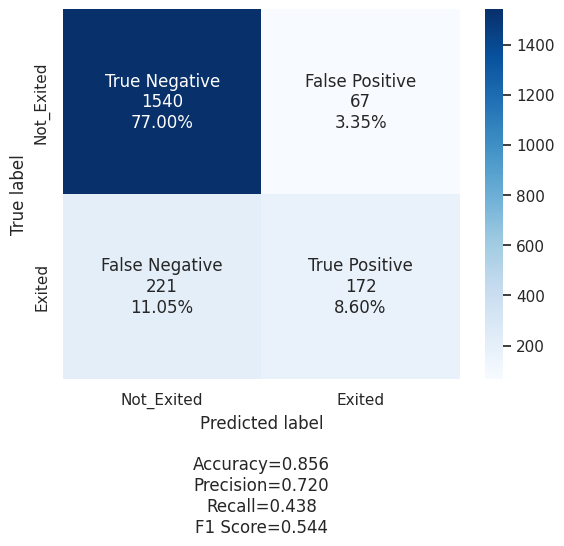

In [298]:
#Calculating the confusion matrix
y_pred_gs=final_model_gs.predict(X_test_normalized)
y_pred_gs = (y_pred_gs > 0.5)
cm_gs=confusion_matrix(y_test, y_pred_gs)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_gs,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

250/250 [==============================] - 0s 1ms/step
Best Threshold=0.180964, G-Mean=0.775


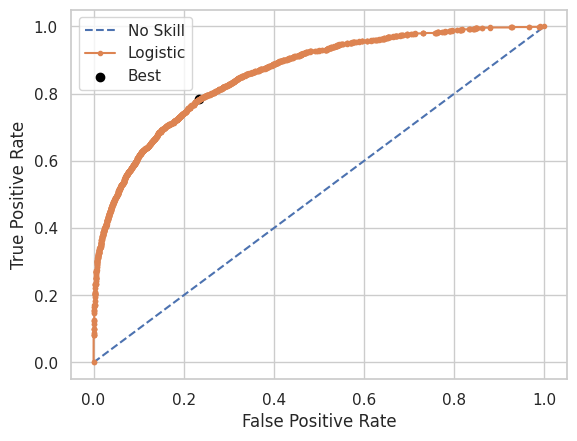

In [299]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = final_model_gs.predict(X_train_normalized)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [300]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred_gs)
recall = recall_score(y_test, y_pred_gs)
precision = precision_score(y_test, y_pred_gs)
f1 = f1_score(y_test, y_pred_gs)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'final_model_gs',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

### Model Improvement: Neural Network model with balanced data[SMOTE]

In [313]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [314]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [315]:
# Balance the data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [316]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [317]:
# Build the Neural Network model
model_5 = Sequential()
model_5.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model_5.add(Dense(units=64, activation='relu'))
model_5.add(Dense(units=1, activation='sigmoid'))

In [318]:
# Compile the model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [319]:
# Train the model
model_5.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
319/319 [==============================] - 4s 6ms/step - loss: 0.4468 - accuracy: 0.7968 - val_loss: 0.4110 - val_accuracy: 0.8108
Epoch 2/50
319/319 [==============================] - 2s 5ms/step - loss: 0.3993 - accuracy: 0.8220 - val_loss: 0.3914 - val_accuracy: 0.8187
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8254 - val_loss: 0.3906 - val_accuracy: 0.8222
Epoch 4/50
319/319 [==============================] - 1s 5ms/step - loss: 0.3840 - accuracy: 0.8292 - val_loss: 0.3839 - val_accuracy: 0.8210
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8309 - val_loss: 0.3902 - val_accuracy: 0.8206
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8315 - val_loss: 0.3913 - val_accuracy: 0.8120
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8338 - val_loss: 0.3822 - val_accuracy: 0.8250
Epoch 

In [320]:
# Evaluate the model on the testing dataset
accuracy = model_5.evaluate(X_test, y_test)[1]
print("Accuracy on test set:", accuracy)

100/100 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8365
Accuracy on test set: 0.8364720940589905


100/100 [==============================] - 0s 1ms/step


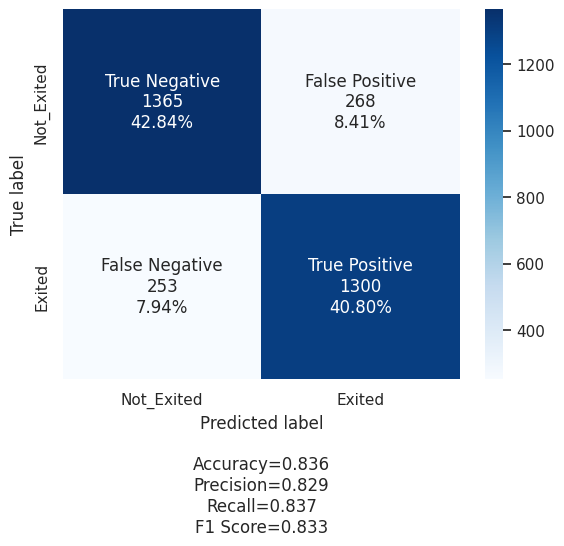

In [321]:
#Calculating the confusion matrix
y_pred5=model_5.predict(X_test)
y_pred5 = (y_pred5 > 0.5)
cm5=confusion_matrix(y_test, y_pred5)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

399/399 [==============================] - 1s 1ms/step
Best Threshold=0.452374, G-Mean=0.886


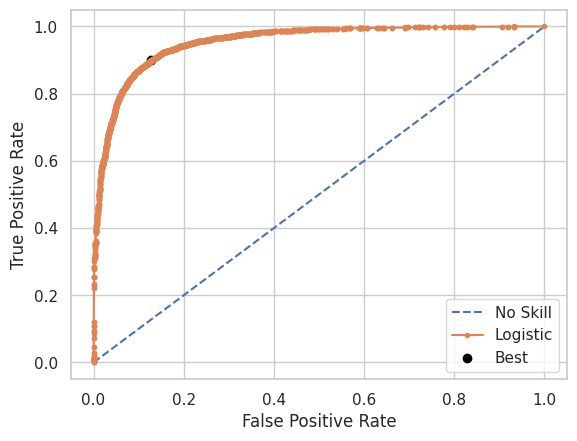

In [322]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_5.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [323]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_5',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

SMOTE with DROPOUT

In [324]:
# We will be adding the layers sequentially
model_6 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_6.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_6.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_6.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_6.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_6.add(Dense(1, activation='sigmoid'))

In [325]:
model_6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [326]:
history_6 = model_6.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
359/359 - 2s - loss: 0.4675 - accuracy: 0.7820 - val_loss: 0.4192 - val_accuracy: 0.7998 - 2s/epoch - 4ms/step
Epoch 2/50
359/359 - 1s - loss: 0.4212 - accuracy: 0.8092 - val_loss: 0.4000 - val_accuracy: 0.8163 - 1s/epoch - 3ms/step
Epoch 3/50
359/359 - 1s - loss: 0.4049 - accuracy: 0.8182 - val_loss: 0.3986 - val_accuracy: 0.8210 - 716ms/epoch - 2ms/step
Epoch 4/50
359/359 - 1s - loss: 0.3984 - accuracy: 0.8204 - val_loss: 0.3860 - val_accuracy: 0.8242 - 682ms/epoch - 2ms/step
Epoch 5/50
359/359 - 1s - loss: 0.3948 - accuracy: 0.8241 - val_loss: 0.3830 - val_accuracy: 0.8297 - 701ms/epoch - 2ms/step
Epoch 6/50
359/359 - 1s - loss: 0.3909 - accuracy: 0.8213 - val_loss: 0.3823 - val_accuracy: 0.8281 - 703ms/epoch - 2ms/step
Epoch 7/50
359/359 - 1s - loss: 0.3916 - accuracy: 0.8274 - val_loss: 0.3932 - val_accuracy: 0.8328 - 695ms/epoch - 2ms/step
Epoch 8/50
359/359 - 1s - loss: 0.3863 - accuracy: 0.8243 - val_loss: 0.3775 - val_accuracy: 0.8344 - 700ms/epoch - 2ms/step
Epoch 

In [327]:
# Evaluate the model on the test set
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

100/100 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8393
Test Loss: 0.3745
Test Accuracy: 0.8393


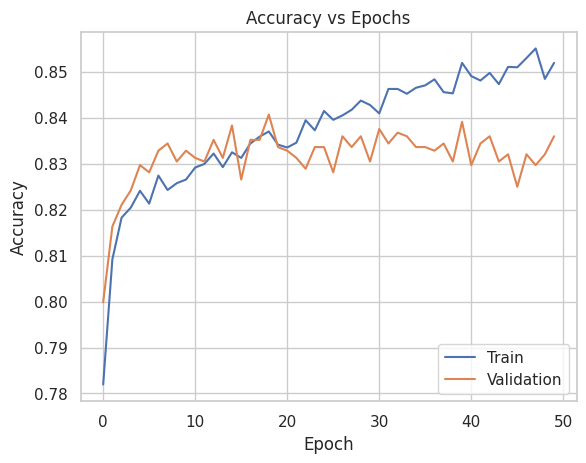

In [328]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

100/100 [==============================] - 0s 1ms/step


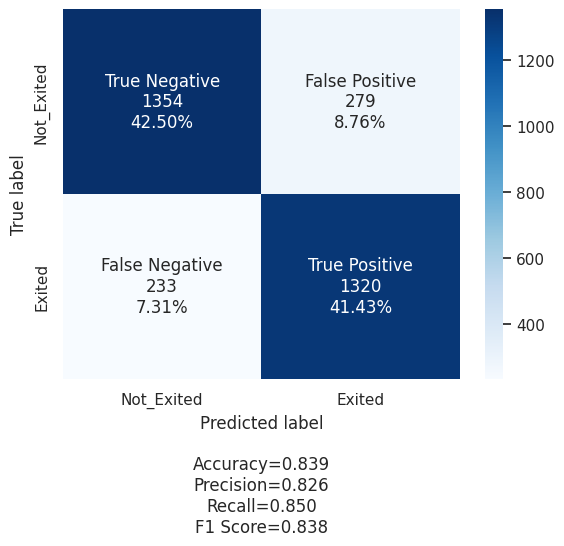

In [329]:
#Calculating the confusion matrix
y_pred6=model_6.predict(X_test)
y_pred6 = (y_pred6 > 0.5)
cm6=confusion_matrix(y_test, y_pred6)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm6,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

399/399 [==============================] - 1s 1ms/step
Best Threshold=0.542486, G-Mean=0.867


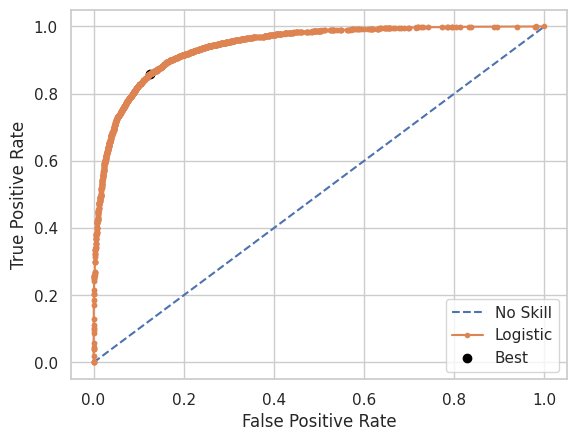

In [330]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [331]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_6',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

SMOTE with batch normalization

In [332]:
model_b = Sequential()
model_b.add(tf.keras.Input(shape=(11,)))
model_b.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model_b.add(Dense(64, activation='relu'))
model_b.add(Dropout(0.10))
model_b.add(Dense(32, activation='relu'))
model_b.add(BatchNormalization(epsilon=0.001))
model_b.add(Dense(16, activation='relu'))
model_b.add(Dense(1, activation='softmax'))

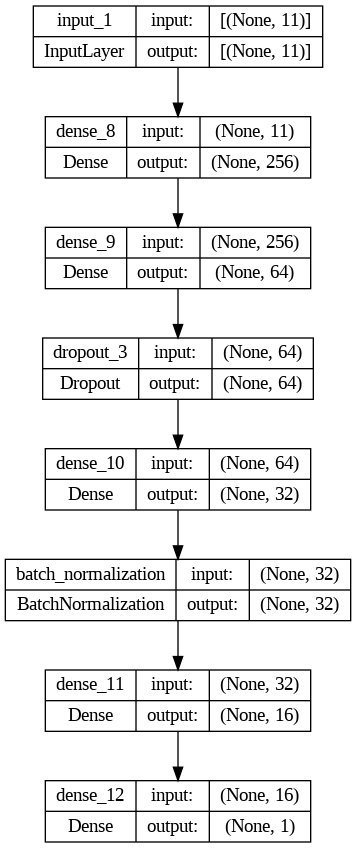

In [333]:
from tensorflow.keras.utils import plot_model
plot_model(model_b, show_shapes=True, show_layer_names=True)

In [334]:
sgd = optimizers.Adam(lr=1e-3)
model_b.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [335]:
history_b = model_b.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
225/225 - 3s - loss: 0.7077 - accuracy: 0.5025 - val_loss: 0.6929 - val_accuracy: 0.4762 - 3s/epoch - 16ms/step
Epoch 2/50
225/225 - 1s - loss: 0.7004 - accuracy: 0.5025 - val_loss: 0.6957 - val_accuracy: 0.4762 - 792ms/epoch - 4ms/step
Epoch 3/50
225/225 - 1s - loss: 0.6965 - accuracy: 0.5025 - val_loss: 0.6957 - val_accuracy: 0.4762 - 973ms/epoch - 4ms/step
Epoch 4/50
225/225 - 1s - loss: 0.6969 - accuracy: 0.5025 - val_loss: 0.6979 - val_accuracy: 0.4762 - 713ms/epoch - 3ms/step
Epoch 5/50
225/225 - 1s - loss: 0.6938 - accuracy: 0.5025 - val_loss: 0.6971 - val_accuracy: 0.4762 - 730ms/epoch - 3ms/step
Epoch 6/50
225/225 - 1s - loss: 0.6916 - accuracy: 0.5025 - val_loss: 0.7003 - val_accuracy: 0.4762 - 732ms/epoch - 3ms/step
Epoch 7/50
225/225 - 1s - loss: 0.6938 - accuracy: 0.5025 - val_loss: 0.6982 - val_accuracy: 0.4762 - 669ms/epoch - 3ms/step
Epoch 8/50
225/225 - 1s - loss: 0.6917 - accuracy: 0.5025 - val_loss: 0.6992 - val_accuracy: 0.4762 - 699ms/epoch - 3ms/step
Ep

100/100 [==============================] - 0s 2ms/step


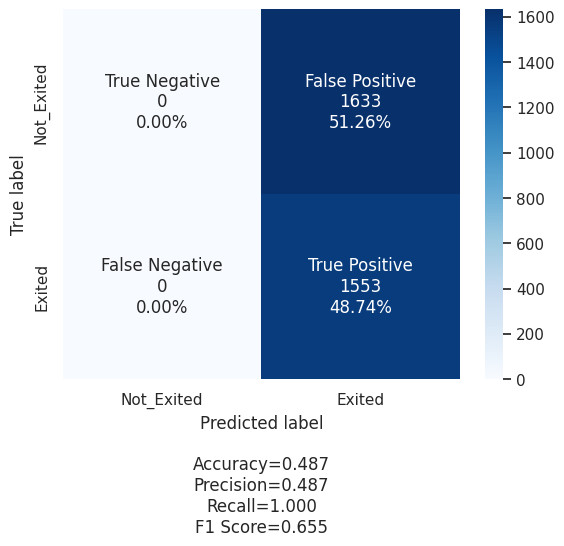

In [338]:
#Calculating the confusion matrix
y_predb=model_b.predict(X_test)
y_predb = (y_predb > 0.5)
cmb=confusion_matrix(y_test, y_predb)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cmb,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

399/399 [==============================] - 2s 4ms/step
Best Threshold=1.000000, G-Mean=0.022


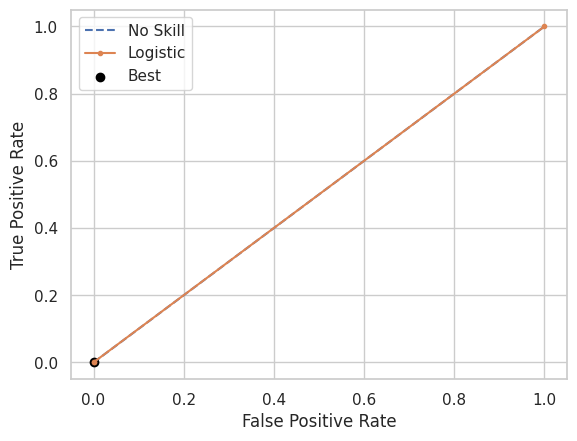

In [336]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_b.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
g_mean=gmeans[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [339]:
# Calculate metrics
test_accuracy = accuracy_score(y_test, y_predb)
recall = recall_score(y_test, y_predb)
precision = precision_score(y_test, y_predb)
f1 = f1_score(y_test, y_predb)

# Append results to DataFrame
result_df = result_df.append({
        'Model Name': 'model_b',
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'G-mean': g_mean
    }, ignore_index=True)

## Final Model

In [340]:
result_df

,Model Name,Test Accuracy,Recall,Precision,F1 Score,G-mean
0,model_1,0.832500,0.302799,0.661111,0.415358,0.708893
1,model_2,0.859000,0.463104,0.719368,0.563467,0.808135
2,model_3,0.859000,0.468193,0.715953,0.566154,0.801104
3,model_4,0.196500,1.000000,0.196500,0.328458,0.000000
4,final_model_gs,0.856000,0.437659,0.719665,0.544304,0.774879
5,model_5,0.836472,0.837090,0.829082,0.833066,0.885608
6,model_6,0.839297,0.849968,0.825516,0.837563,0.866731
7,model_b,0.487445,1.000000,0.487445,0.655413,0.021632


In [341]:
# Define a function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to the DataFrame
styled_df = result_df.style.apply(highlight_max, subset=result_df.columns[1:])

# Display the styled DataFrame
styled_df

,Model Name,Test Accuracy,Recall,Precision,F1 Score,G-mean
0,model_1,0.832500,0.302799,0.661111,0.415358,0.708893
1,model_2,0.859000,0.463104,0.719368,0.563467,0.808135
2,model_3,0.859000,0.468193,0.715953,0.566154,0.801104
3,model_4,0.196500,1.000000,0.196500,0.328458,0.000000
4,final_model_gs,0.856000,0.437659,0.719665,0.544304,0.774879
5,model_5,0.836472,0.837090,0.829082,0.833066,0.885608
6,model_6,0.839297,0.849968,0.825516,0.837563,0.866731
7,model_b,0.487445,1.000000,0.487445,0.655413,0.021632


Model_6 with highest recall is chosen.

In [342]:
# We will be adding the layers sequentially
Final_model = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
Final_model.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
Final_model.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
Final_model.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
Final_model.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
Final_model.add(Dense(1, activation='sigmoid'))

In [343]:
Final_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Final_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1536      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [344]:
history = Final_model.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=2)

Epoch 1/50
359/359 - 5s - loss: 0.4645 - accuracy: 0.7845 - val_loss: 0.4132 - val_accuracy: 0.8108 - 5s/epoch - 14ms/step
Epoch 2/50
359/359 - 1s - loss: 0.4150 - accuracy: 0.8128 - val_loss: 0.4001 - val_accuracy: 0.8171 - 1s/epoch - 3ms/step
Epoch 3/50
359/359 - 1s - loss: 0.4045 - accuracy: 0.8174 - val_loss: 0.3897 - val_accuracy: 0.8155 - 1s/epoch - 3ms/step
Epoch 4/50
359/359 - 1s - loss: 0.3984 - accuracy: 0.8223 - val_loss: 0.3914 - val_accuracy: 0.8250 - 1s/epoch - 3ms/step
Epoch 5/50
359/359 - 1s - loss: 0.3940 - accuracy: 0.8212 - val_loss: 0.3864 - val_accuracy: 0.8336 - 960ms/epoch - 3ms/step
Epoch 6/50
359/359 - 1s - loss: 0.3912 - accuracy: 0.8244 - val_loss: 0.3882 - val_accuracy: 0.8265 - 1s/epoch - 3ms/step
Epoch 7/50
359/359 - 1s - loss: 0.3906 - accuracy: 0.8223 - val_loss: 0.3906 - val_accuracy: 0.8305 - 998ms/epoch - 3ms/step
Epoch 8/50
359/359 - 1s - loss: 0.3853 - accuracy: 0.8286 - val_loss: 0.3832 - val_accuracy: 0.8305 - 1s/epoch - 3ms/step
Epoch 9/50
359/35

In [345]:
# Evaluate the model on the test set
loss, accuracy = Final_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

100/100 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8302
Test Loss: 0.3711
Test Accuracy: 0.8302


100/100 [==============================] - 0s 1ms/step


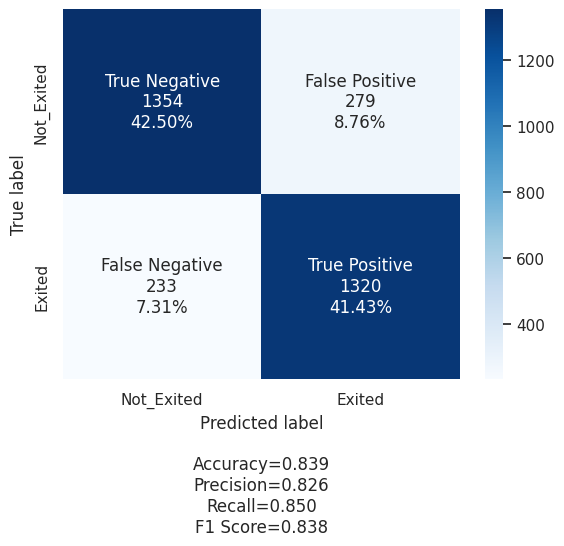

In [346]:
#Calculating the confusion matrix
y_pred=Final_model.predict(X_test)
y_pred = (y_pred6 > 0.5)
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**Insights:**

1. **Tenure Impact:** Both short and long-term customers exhibit higher churn rates, necessitating targeted strategies for customer retention.

2. **Inactive Members Challenge:** A significant portion of inactive members is a concern, emphasizing the need for programs to convert them into active customers to reduce overall churn.

3. **Gender Disparities:** Female customers are more likely to churn, and a notable number of churned customers hold credit cards.

4. **Age-Related Patterns:** Older customers are more prone to churn, suggesting the need to reassess target markets and retention strategies for different age groups.

**Business Recommendations:**

1. **Tenure Strategies:**
   - Develop targeted retention strategies for both new and long-term customers.
   - Evaluate and implement personalized incentives for clients with significant bank balances.

2. **Inactive Member Conversion:**
   - Launch programs to convert inactive members into active customers.
   - Provide incentives or promotions to increase engagement and product usage.

3. **Gender-Specific Retention Efforts:**
   - Develop initiatives tailored to address the higher churn among female customers.
   - Conduct surveys to understand specific needs and concerns of female clients.

4. **Credit Card Usage Analysis:**
   - Investigate reasons for higher churn among credit cardholders.
   - Enhance communication and support for credit card users to improve their banking experience.

5. **Age-Specific Service Enhancements:**
   - Tailor services and offerings to meet the preferences of different age groups.
   - Reassess marketing and communication strategies to align with each age category's service preferences.

6. **Continuous Monitoring and Adaptation:**
   - Implement regular monitoring of customer feedback, satisfaction, and churn indicators.
   - Continuously adapt strategies based on evolving customer needs and market dynamics.

___